In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:

df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')  
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

print(f"Fraud cases: {len(fraud)}")
print(f"Normal cases: {len(normal)}")
print(f"Fraud %: {len(fraud) / len(df) * 100:.5f}%")
print(f"Normal %: {len(normal) / len(df) * 100:.5f}%")



Fraud cases: 492
Normal cases: 284315
Fraud %: 0.17275%
Normal %: 99.82725%


In [25]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [26]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


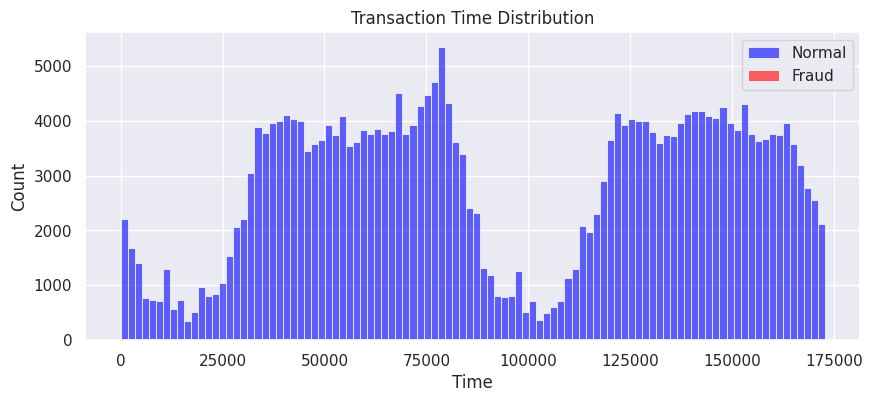

In [53]:
plt.figure(figsize=(10, 4))
sns.histplot(normal['Time'], bins=100, color='blue', label='Normal', alpha=0.6)
sns.histplot(fraud['Time'], bins=100, color='red', label='Fraud', alpha=0.6)
plt.title("Transaction Time Distribution")
plt.legend()
plt.show() 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


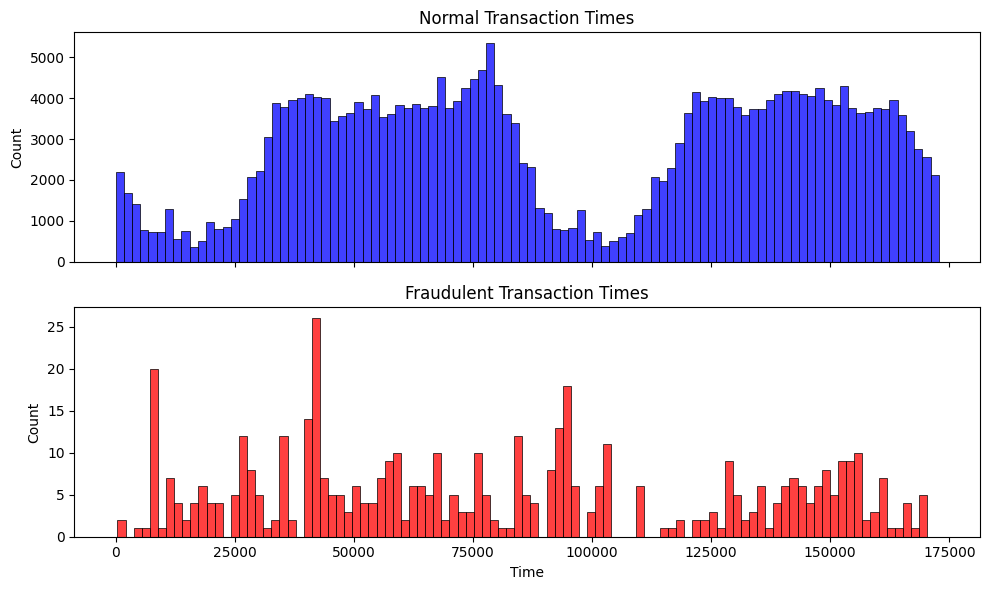

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

sns.histplot(normal['Time'], bins=100, color='blue', ax=axes[0])
axes[0].set_title('Normal Transaction Times')

sns.histplot(fraud['Time'], bins=100, color='red', ax=axes[1])
axes[1].set_title('Fraudulent Transaction Times')

plt.xlabel('Time')
plt.tight_layout()
plt.show()


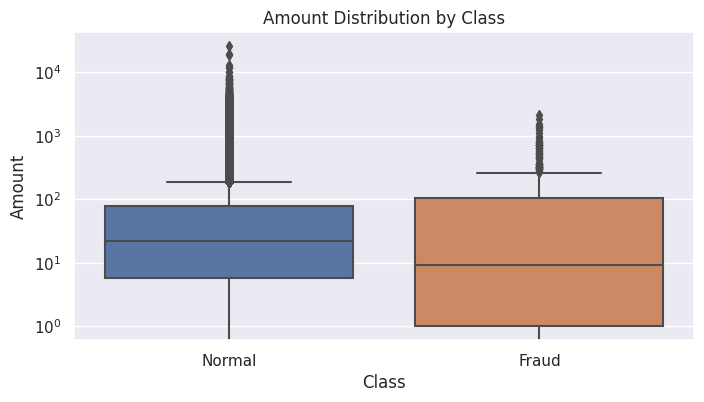

In [35]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount Distribution by Class")
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.yscale('log')  
plt.show()


1.Amount alone is not a perfect indicator of fraud.
2.Fraud can occur at both small and large amounts, though it tends to have more variance.
3.should not rely solely on amount to detect fraud — it needs to be combined with other features (like V1 to V28)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


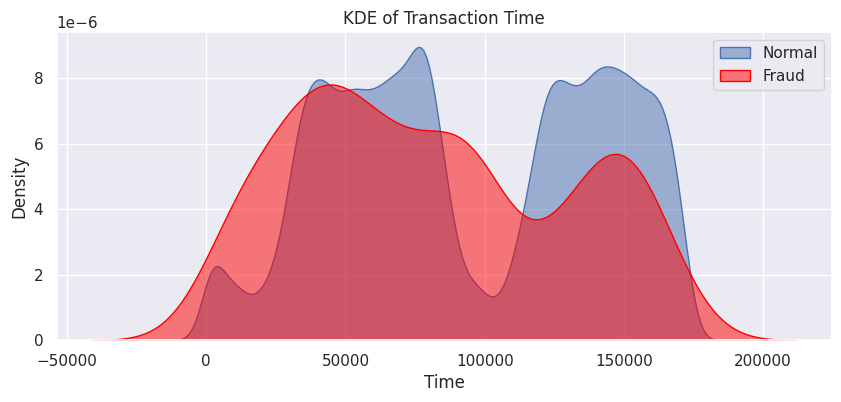

In [36]:
plt.figure(figsize=(10, 4))
sns.kdeplot(normal['Time'], label='Normal', fill=True, alpha=0.5)
sns.kdeplot(fraud['Time'], label='Fraud', fill=True, alpha=0.5, color='red')
plt.title("KDE of Transaction Time")
plt.legend()
plt.show()


1.The presence of clear peaks in the red (fraud) curve suggests that fraudulent activities are not spread evenly throughout the observed time period. Instead, frauds are more likely to occur at certain times, forming clusters.

2.The fraud distribution is noticeably different from the normal transaction distribution. This could imply that fraudsters may be targeting specific windows of time, possibly when legitimate activity is lower or monitoring is less stringent.

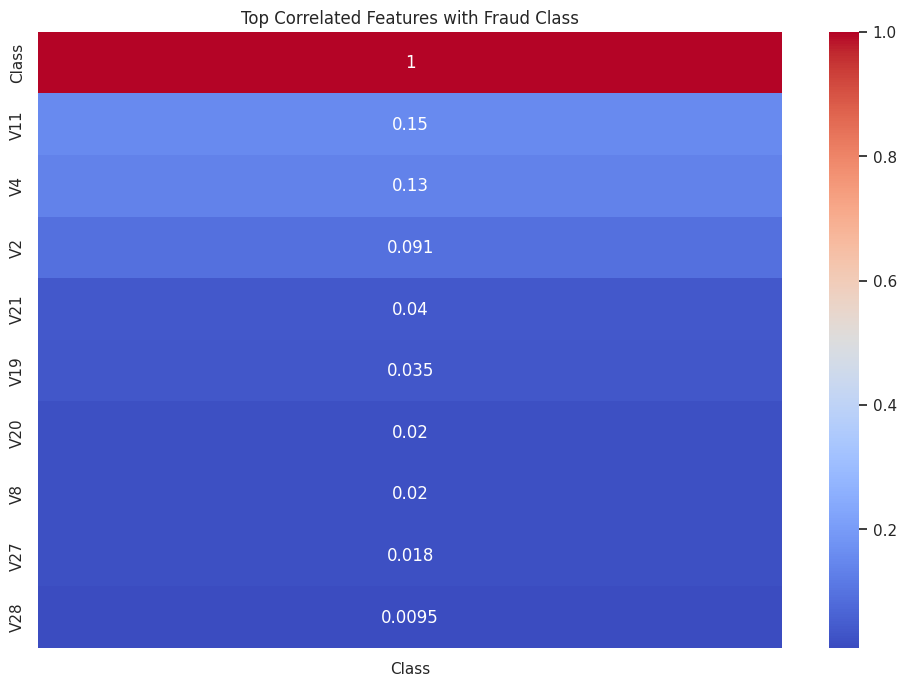

In [48]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False).head(10), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with Fraud Class")
plt.show()

Redder cells: Strong positive correlation with fraud (as the feature increases, likelihood of fraud increases).

Bluer cells: Strong negative correlation with fraud (as the feature increases, likelihood of fraud decreases).

White/neutral cells: Little or no correlation

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


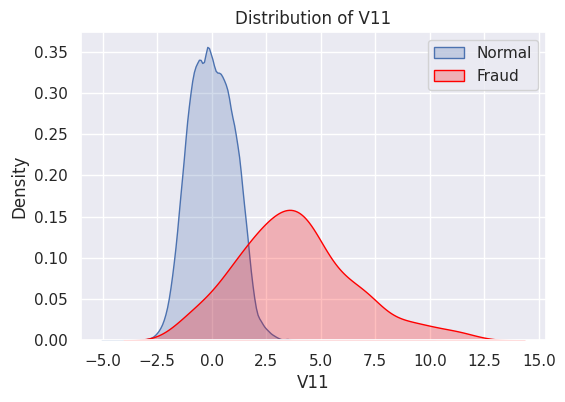

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


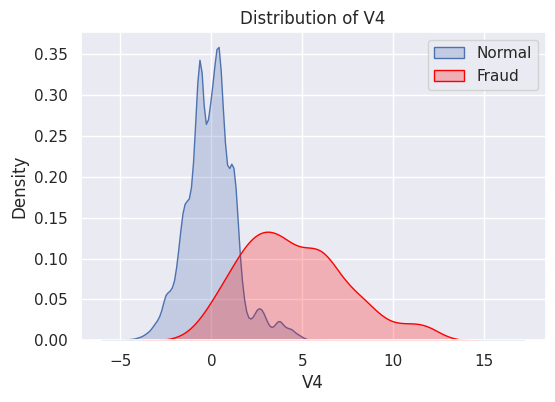

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


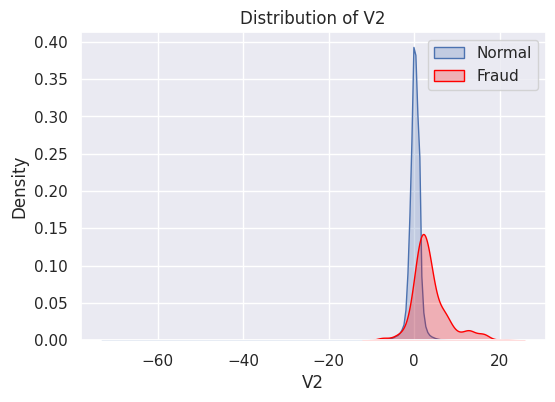

In [47]:
top_features = ['V11', 'V4', 'V2']

for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(normal[feature], label='Normal', fill=True)
    sns.kdeplot(fraud[feature], label='Fraud', fill=True, color='red')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


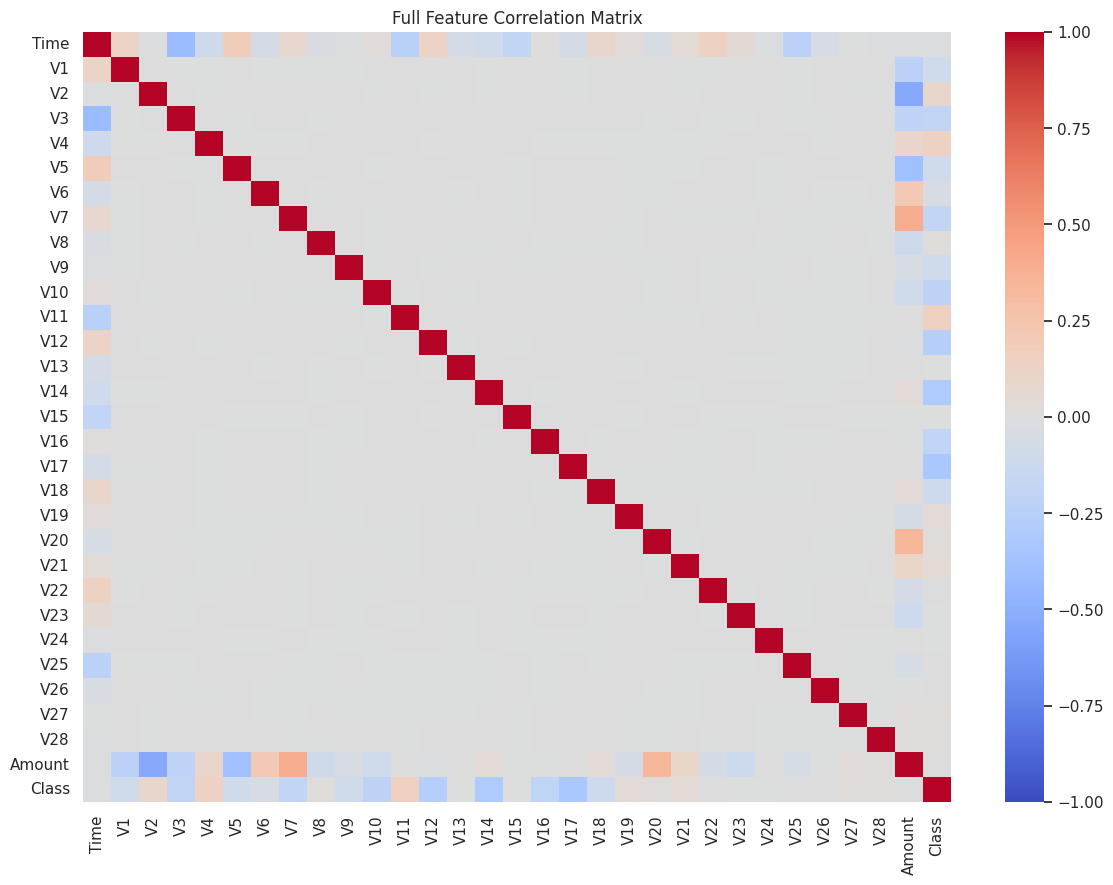

In [49]:
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Full Feature Correlation Matrix")
plt.show()


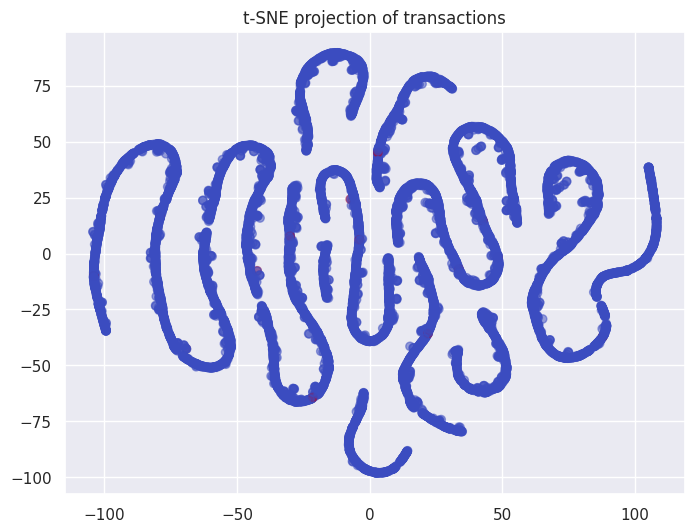

In [50]:
from sklearn.manifold import TSNE

sample_df = df.sample(n=10000, random_state=42)
X = sample_df.drop(['Class'], axis=1)
y = sample_df['Class']

tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title("t-SNE projection of transactions")
plt.show()


Visualizing Overlap:
t-SNE tells that fraudulent transactions are embedded within the normal transaction space, confirming the need for sophisticated, non-linear models for fraud detection.

Model Implications:
Since frauds are not cleanly separable, simple models (logistic regression) may struggle, and more advanced techniques (ensemble methods, deep learning) are justified.

Final Observation:

1.Fraud Ratio: Fraudulent transactions make up only 0.17% of the dataset, indicating a significant class imbalance.
2.Transaction Amounts: Most transaction amounts are low, but fraud occurs at various amounts.
3.Feature Correlation: Certain PCA-transformed features (e.g., V2,V4, V11) are more correlated with fraud. These can be important for model training.
4.Model Required:Since fraud transactions aren't easily separable; non-linear model technique are applicable to detect fraud transactions 